## Prediction Intervals for the CPL
Author: Clara Hoffmann

In [1]:
# load packages
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from helpers import confidence_intervals

In [2]:
# load cdf for each validation observation
va_horse = np.load('../../../../data/commaai/calibration/cpl_dens/va_horse_cdf_is.npy')
hmc_horse = np.load('../../../../data/commaai/calibration/cpl_dens/hmc_horse_cdf_is.npy')
va_ridge = np.load('../../../../data/commaai/calibration/cpl_dens/va_ridge_cdf_is.npy')
hmc_ridge = np.load('../../../../data/commaai/calibration/cpl_dens/hmc_ridge_cdf_is.npy')

In [5]:
# load density, true angles
true_y = np.load('../../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/labels_val.npy')
density_path = '../../../../data/commaai/density/gaussian_density_filtered.csv'
density = pd.read_csv(density_path)
# where to evaluate densities
grid = np.linspace(min(density['axes']), max(density['axes']), 750)
mc_dens = np.load('../../../../data/commaai/predictions/mc_dropout/cdf_is_mc_dropout.npy')

In [6]:
# confidence levels
alphas = np.append(np.linspace(0.05, 0.95, 10), float(0.99))

In [7]:
va_horse_ci = confidence_intervals(alphas, va_horse, true_y, grid)
hmc_horse_ci = confidence_intervals(alphas, hmc_horse, true_y, grid)
va_ridge_ci = confidence_intervals(alphas, va_ridge, true_y, grid)
hmc_ridge_ci = confidence_intervals(alphas, hmc_ridge, true_y, grid)
mc_ci = confidence_intervals(alphas, mc_dens, true_y, grid)

 91%|█████████ | 10/11 [00:35<00:03,  3.53s/it]

error at index:4784
error at index:5838
error at index:5839
error at index:7547


100%|██████████| 11/11 [00:38<00:00,  3.51s/it]


## Prediction Interval Coverage Rates

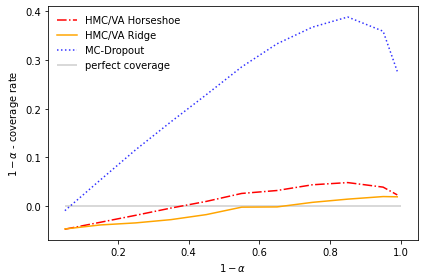

In [8]:
levels = np.append(np.linspace(0.05, 0.95, 10), float(0.99))
plt.hlines(0, 0.05, 1, color = 'black', label ='perfect coverage', alpha = 0.2)
plt.plot(levels, levels - np.array(va_horse_ci['coverage_rate']), linestyle = '-.', label = 'HMC/VA Horseshoe', color = 'red')
#plt.plot(levels, levels - np.array(hmc_horse_ci['coverage_rate']), linestyle = 'dotted', label = 'HMC/Horseshoe', color = 'darkred')
plt.plot(levels, levels - np.array(va_ridge_ci['coverage_rate']), label = 'HMC/VA Ridge', color = 'orange')
plt.plot(levels, levels - np.array(mc_ci['coverage_rate']), linestyle = ':', label = 'MC-Dropout', color = 'blue', alpha = 0.8)
#plt.plot(levels, levels - np.array(hmc_ridge_ci['coverage_rate']), label = 'HMC/Ridge', color = 'darkorange')
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'$1- \alpha$ - coverage rate')
plt.legend()
plt.legend(framealpha=0.0)
plt.tight_layout()
plt.savefig('coverage_rate_cpl_dropout.png', dpi = 300)
# coverage rate is actually higher than predicted coverage rate

## PI width

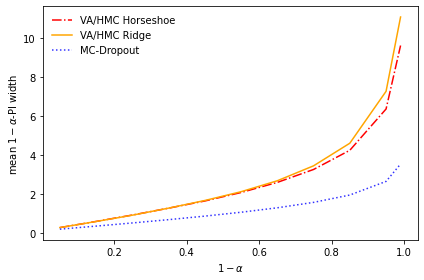

In [9]:
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(va_horse_ci['pred_int_width'])), axis = 1), label = 'VA/HMC Horseshoe', color = 'red', linestyle = '-.')
#plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(hmc_horse_ci['pred_int_width'])), axis = 1), label = 'HMC/Horseshoe', linestyle = 'dotted',color = 'darkred')
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(va_ridge_ci['pred_int_width'])), axis = 1), label = 'VA/HMC Ridge',  color = 'orange')
plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(mc_ci['pred_int_width'])), axis = 1), label = 'MC-Dropout', linestyle = ':',  color = 'blue', alpha = 0.8)
#plt.plot(np.append(np.linspace(0.05, 0.95, 10), float(0.99)), np.mean(np.abs(np.array(hmc_ridge_ci['pred_int_width'])), axis = 1), label = 'HMC/Ridge', color = 'darkorange')
plt.xlabel((r'$1- \alpha$'))
plt.ylabel(r'mean $1 - \alpha$-PI width')
plt.legend()
plt.legend(framealpha=0.0)
plt.tight_layout()
plt.savefig('mean_pi_width_cpl.png', dpi = 300)